In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [370]:
dispo_alimantaire = pd.read_csv("DisponibiliteAlimentaire_2017.csv")
population = pd.read_csv("Population.csv")
PIB_Habitant = pd.read_csv("PIB_par_Habitant.csv")
Stabilite_politique = pd.read_csv("Stabilité_Politique.csv")

In [371]:
#Nettoyage dispo_alimentaire
dispo_alimantaire.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [372]:
dispo_alimantaire.dtypes

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
dtype: object

In [373]:
dispo_alimantaire.isnull().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

In [374]:
dispo_alimantaire_volaille = dispo_alimantaire.loc[dispo_alimantaire["Produit"] == "Viande de Volailles"]
dispo_alimantaire_volaille.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.0,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.0,S,Données standardisées


In [375]:
# Créer le tableau croisé dynamique
dispo_alimentaire_volaille = dispo_alimantaire.pivot_table(
    index='Zone',               # Zone en ligne
    columns='Élément',         # Élément en colonnes
    values='Valeur',           # Valeur à agréger
    aggfunc='sum',             # Fonction d'agrégation
    fill_value=0               # Remplacer les NaN par 0
)

# Réinitialiser les colonnes pour un affichage plus propre
dispo_alimentaire_volaille.columns.name = None  # Supprimer le nom des colonnes
dispo_alimentaire_volaille.reset_index(inplace=True)

# Afficher le tableau croisé dynamique
dispo_alimentaire_volaille.head()

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,0.0,456.0,94.0,1997.0,357.31,30.63,54.09,15139.0,601.0,4555.0,12968.0,1146.0,11609.0,-111.0,470.0,115.0,426.0
1,Afrique du Sud,0.0,9371.0,1448.0,2987.0,556.42,81.92,83.36,66840.0,10968.0,9020.0,31726.0,3108.0,68455.0,-594.0,212.0,21564.0,-322.0
2,Albanie,0.0,697.0,177.0,3400.0,1260.49,117.57,119.50,4879.0,156.0,884.0,3631.0,321.0,4231.0,-115.0,53.0,113.0,72.0
3,Algérie,0.0,4884.0,2405.0,3345.0,798.71,79.62,92.85,45365.0,743.0,19718.0,33056.0,3683.0,26763.0,-22.0,358.0,993.0,374.0
4,Allemagne,0.0,30904.0,8316.0,3559.0,943.24,147.96,104.07,174960.0,58793.0,66550.0,77988.0,5756.0,167828.0,-831.0,1712.0,51109.0,651.0


In [376]:
dispo_alimentaire_volaille.isnull().sum()

Zone                                                             0
Alimentation pour touristes                                      0
Aliments pour animaux                                            0
Autres utilisations (non alimentaire)                            0
Disponibilité alimentaire (Kcal/personne/jour)                   0
Disponibilité alimentaire en quantité (kg/personne/an)           0
Disponibilité de matière grasse en quantité (g/personne/jour)    0
Disponibilité de protéines en quantité (g/personne/jour)         0
Disponibilité intérieure                                         0
Exportations - Quantité                                          0
Importations - Quantité                                          0
Nourriture                                                       0
Pertes                                                           0
Production                                                       0
Résidus                                                       

In [377]:
dispo_alimentaire_volaille = dispo_alimentaire_volaille[['Zone', 'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', "Production"]]
dispo_alimentaire_volaille.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,357.31,15139.0,601.0,4555.0,11609.0
1,Afrique du Sud,556.42,66840.0,10968.0,9020.0,68455.0
2,Albanie,1260.49,4879.0,156.0,884.0,4231.0
3,Algérie,798.71,45365.0,743.0,19718.0,26763.0
4,Allemagne,943.24,174960.0,58793.0,66550.0,167828.0


In [378]:
dispo_alimentaire_volaille['%Dependance importation'] = round((dispo_alimentaire_volaille['Importations - Quantité']/(dispo_alimentaire_volaille['Production'] + dispo_alimentaire_volaille['Importations - Quantité'] - dispo_alimentaire_volaille["Exportations - Quantité"]))*100,2)
dispo_alimentaire_volaille.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,%Dependance importation
0,Afghanistan,357.31,15139.0,601.0,4555.0,11609.0,29.27
1,Afrique du Sud,556.42,66840.0,10968.0,9020.0,68455.0,13.56
2,Albanie,1260.49,4879.0,156.0,884.0,4231.0,17.83
3,Algérie,798.71,45365.0,743.0,19718.0,26763.0,43.11
4,Allemagne,943.24,174960.0,58793.0,66550.0,167828.0,37.90


In [379]:
dispo_alimentaire_volaille = dispo_alimentaire_volaille.rename(
    columns={'Disponibilité alimentaire en quantité (kg/personne/an)': 'Dispo alimentaire (kg/personne/an)'}
)
dispo_alimentaire_volaille.head()

,Zone,Dispo alimentaire (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,%Dependance importation
0,Afghanistan,357.31,15139.0,601.0,4555.0,11609.0,29.27
1,Afrique du Sud,556.42,66840.0,10968.0,9020.0,68455.0,13.56
2,Albanie,1260.49,4879.0,156.0,884.0,4231.0,17.83
3,Algérie,798.71,45365.0,743.0,19718.0,26763.0,43.11
4,Allemagne,943.24,174960.0,58793.0,66550.0,167828.0,37.90


In [380]:
dispo_alimantaire = dispo_alimantaire.replace('Tükey', 'Turquie')

# Population

In [381]:
#Nettoyage popuplation
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [382]:
population.isnull().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

In [383]:
population = population[population['Année'] == 2017]
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
17,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
36,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
55,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,2884.169,X,Sources internationales sûres,NaN
74,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,41389.189,X,Sources internationales sûres,NaN
93,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,82658.409,X,Sources internationales sûres,NaN


In [384]:
population.isnull().sum()

Code Domaine                0
Domaine                     0
Code zone                   0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      235
dtype: int64

In [385]:
population = population[['Zone', 'Valeur']]
population = population.rename(columns={'Valeur' : 'Population'})
population.head()

,Zone,Population
17,Afghanistan,36296.113
36,Afrique du Sud,57009.756
55,Albanie,2884.169
74,Algérie,41389.189
93,Allemagne,82658.409


In [386]:
population = population.replace('Pays-Bas (Royaume des)', 'Pays-Bas')

# PIB/Habitant

In [387]:
#Nettoyage PIB_par_habitant
PIB_Habitant.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,Int$/cap,2956.8,X,Chiffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,Int$/cap,14823.6,X,Chiffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,8,Albanie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,Int$/cap,14229.3,X,Chiffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,12,Algérie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,Int$/cap,13805.4,X,Chiffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,276,Allemagne,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,Int$/cap,61563.6,X,Chiffre de sources internationales,NaN


In [388]:
PIB_Habitant.isnull().sum()

Code Domaine                0
Domaine                     0
Code zone (M49)             0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      190
dtype: int64

In [389]:
PIB_Habitant = PIB_Habitant[['Zone', 'Valeur']]
PIB_Habitant = PIB_Habitant.rename(columns={"Valeur" : "PIB_Habitant"})
PIB_Habitant.head()

,Zone,PIB_Habitant
0,Afghanistan,2956.8
1,Afrique du Sud,14823.6
2,Albanie,14229.3
3,Algérie,13805.4
4,Allemagne,61563.6


In [390]:
PIB_Habitant = PIB_Habitant.replace('Pays-Bas (Royaume des)', 'Pays-Bas')
PIB_Habitant = PIB_Habitant.replace('Türkiye', 'Turquie')

# Stabilité Politique

In [391]:
#Nettoyage Stabilité_politique
Stabilite_politique.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-2.79,X,Chiffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-0.28,X,Chiffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,0.37,X,Chiffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,12,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-0.92,X,Chiffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,276,Allemagne,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,0.57,X,Chiffre de sources internationales,NaN


In [392]:
Stabilite_politique.isnull().sum()

Code Domaine                0
Domaine                     0
Code zone (M49)             0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                     196
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      196
dtype: int64

In [393]:
Stabilite_politique = Stabilite_politique[["Zone", "Valeur"]]
Stabilite_politique = Stabilite_politique.rename(columns={"Valeur" : "Stabilite_politique"})
Stabilite_politique.head()

,Zone,Stabilite_politique
0,Afghanistan,-2.79
1,Afrique du Sud,-0.28
2,Albanie,0.37
3,Algérie,-0.92
4,Allemagne,0.57


In [394]:
Stabilite_politique = Stabilite_politique.replace('Pays-Bas (Royaume des)', 'Pays-Bas')
Stabilite_politique = Stabilite_politique.replace('Türkiye', 'Turquie')

# Creation du dataFrame final

In [395]:
#liste des dataframes
df_liste = ['Dispo_alimentaire_volaille', 'population', 'PIB_Habitant', 'Stabilite_politique']

In [396]:
#Nombre de pays dans chaque dataframe
for df in df_liste:
    n_pays = eval(df)['Zone'].nunique()
    print(f'{df} - {n_pays}')


Dispo_alimentaire_volaille - 174
population - 236
PIB_Habitant - 190
Stabilite_politique - 196


In [397]:
df = pd.merge(population, Stabilite_politique, on='Zone', how='left')
df.head()

,Zone,Population,Stabilite_politique
0,Afghanistan,36296.113,-2.79
1,Afrique du Sud,57009.756,-0.28
2,Albanie,2884.169,0.37
3,Algérie,41389.189,-0.92
4,Allemagne,82658.409,0.57


In [398]:
df = pd.merge(df, PIB_Habitant, on='Zone', how='left')
df.head()

,Zone,Population,Stabilite_politique,PIB_Habitant
0,Afghanistan,36296.113,-2.79,2956.8
1,Afrique du Sud,57009.756,-0.28,14823.6
2,Albanie,2884.169,0.37,14229.3
3,Algérie,41389.189,-0.92,13805.4
4,Allemagne,82658.409,0.57,61563.6


In [399]:
df = pd.merge(df, Dispo_alimentaire_volaille, on='Zone', how='left')
df.head()

,Zone,Population,Stabilite_politique,PIB_Habitant,Dispo alimentaire (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,%Dependance importation
0,Afghanistan,36296.113,-2.79,2956.8,357.31,15139.0,601.0,4555.0,11609.0,29.27
1,Afrique du Sud,57009.756,-0.28,14823.6,556.42,66840.0,10968.0,9020.0,68455.0,13.56
2,Albanie,2884.169,0.37,14229.3,1260.49,4879.0,156.0,884.0,4231.0,17.83
3,Algérie,41389.189,-0.92,13805.4,798.71,45365.0,743.0,19718.0,26763.0,43.11
4,Allemagne,82658.409,0.57,61563.6,943.24,174960.0,58793.0,66550.0,167828.0,37.90


In [400]:
df.shape

(236, 10)

In [401]:
df.duplicated().sum()

0

In [402]:
df.isnull().sum()

Zone                                   0
Population                             0
Stabilite_politique                   40
PIB_Habitant                          47
Dispo alimentaire (kg/personne/an)    62
Disponibilité intérieure              62
Exportations - Quantité               62
Importations - Quantité               62
Production                            62
%Dependance importation               62
dtype: int64

In [403]:
pd.set_option('display.max_rows', None)
df[df.isna().any(axis='columns')]

,Zone,Population,Stabilite_politique,PIB_Habitant,Dispo alimentaire (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,%Dependance importation
5,Andorre,77.001,1.39,63176.7,NaN,NaN,NaN,NaN,NaN,NaN
7,Anguilla,14.584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antilles néerlandaises (ex),275.186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Aruba,105.366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Bahreïn,1494.076,-0.96,53451.0,NaN,NaN,NaN,NaN,NaN,NaN
26,Bhoutan,745.563,1.10,13450.5,NaN,NaN,NaN,NaN,NaN,NaN
28,"Bonaire, Saint-Eustache et Saba",25.401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Burundi,10827.019,-2.00,908.7,NaN,NaN,NaN,NaN,NaN,NaN
43,"Chine, continentale",1421021.791,NaN,16461.1,968.52,2303613.0,40251.0,205903.0,2147703.0,8.90
44,"Chine, Taiwan Province de",23674.546,NaN,NaN,640.37,25365.0,1669.0,14429.0,13170.0,55.65


In [404]:
df.loc[(df['Zone'] == "Venezuela (République bolivarienne du)"), 'PIB_Habitant'] = 12500.0

In [405]:
df.loc[(df['Zone'] == "Chine, continentale"), 'Stabilite_politique'] = 0.21
df.loc[(df['Zone'] == "Chine, Taiwan Province de"), 'Stabilite_politique'] = 0.24

In [406]:
df = df.loc[(~df['Stabilite_politique'].isna()) & 
            (~df['PIB_Habitant'].isna()) & 
            (~df['Dispo alimentaire (kg/personne/an)'].isna()) & 
            (~df['Disponibilité intérieure'].isna()) & 
            (~df['Exportations - Quantité'].isna()) & 
            (~df['Importations - Quantité'].isna())]

df.head()

,Zone,Population,Stabilite_politique,PIB_Habitant,Dispo alimentaire (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,%Dependance importation
0,Afghanistan,36296.113,-2.79,2956.8,357.31,15139.0,601.0,4555.0,11609.0,29.27
1,Afrique du Sud,57009.756,-0.28,14823.6,556.42,66840.0,10968.0,9020.0,68455.0,13.56
2,Albanie,2884.169,0.37,14229.3,1260.49,4879.0,156.0,884.0,4231.0,17.83
3,Algérie,41389.189,-0.92,13805.4,798.71,45365.0,743.0,19718.0,26763.0,43.11
4,Allemagne,82658.409,0.57,61563.6,943.24,174960.0,58793.0,66550.0,167828.0,37.90


# Annalyse descriptive

In [407]:
df.describe().T.style.format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
Population,167.00,43560.96,155286.94,52.05,2624.02,9487.20,31274.47,1421021.79
Stabilite_politique,167.00,-0.04,0.87,-2.79,-0.63,0.03,0.66,1.56
PIB_Habitant,167.00,24120.17,24390.70,1059.00,5957.50,15285.20,33533.55,135547.00
Dispo alimentaire (kg/personne/an),167.00,687.97,214.17,0.00,534.53,676.16,886.16,1260.49
Disponibilité intérieure,167.00,65599.74,228191.72,4.00,2704.50,11909.00,34536.00,2303613.00
Exportations - Quantité,167.00,9498.71,24233.43,0.00,173.50,856.00,7324.50,207278.00
Importations - Quantité,167.00,8691.01,20183.29,1.00,694.00,2661.00,7716.50,205903.00
Production,167.00,67060.31,227996.80,0.00,1995.00,10673.00,33229.50,2147703.00
%Dependance importation,167.00,32.46,28.98,0.57,10.64,22.17,47.98,148.83


In [408]:
indicateurs = (list(df.columns))
indicateurs.remove('Zone')

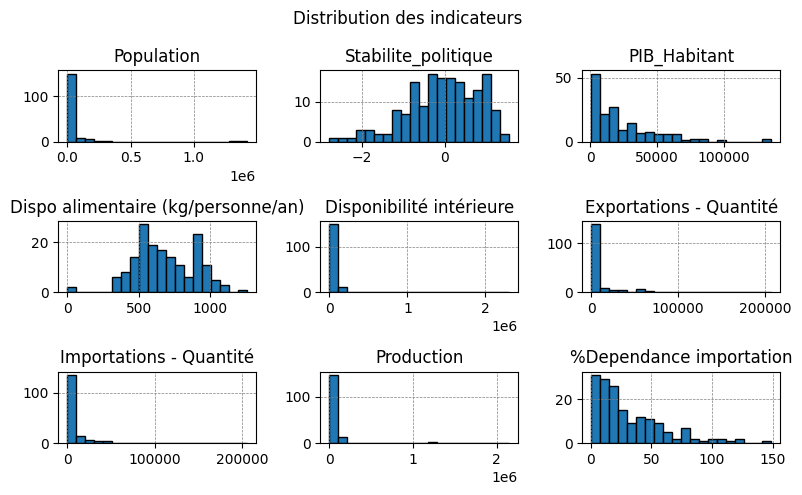

In [409]:
fig, axs = plt.subplots(3, 3, figsize=(8, 5))

for i, indicateurs, in enumerate(indicateurs):
    r = i // 3
    c = i % 3
    axs[r, c].hist(indicateurs, data=df, edgecolor='k', bins=20)
    axs[r, c].set_title(indicateurs)
    axs[r, c].tick_params
    axs[r, c].grid(color='gray', linestyle='--', linewidth=0.5)

fig.suptitle('Distribution des indicateurs')


[fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]

plt.tight_layout()
plt.show()

In [410]:
indicateurs = (list(df.columns))
indicateurs.remove('Zone')

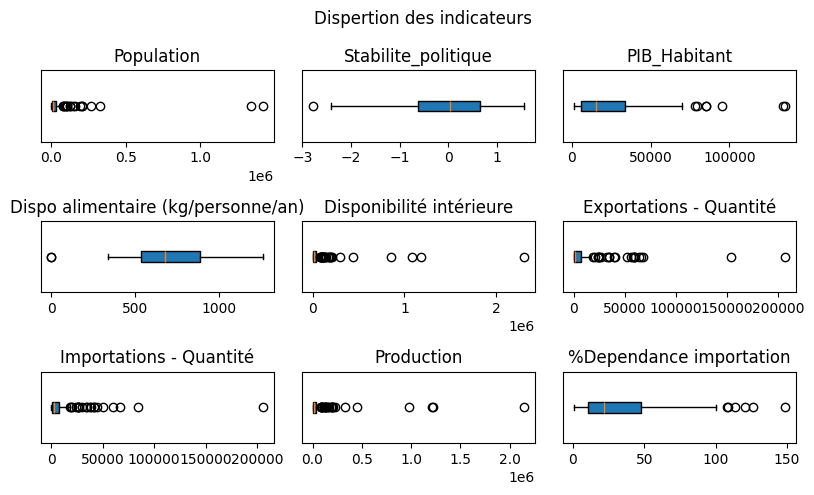

In [411]:
fig, axs = plt.subplots(3, 3, figsize=(8, 5))

for i, indicateurs, in enumerate(indicateurs):
    r = i // 3
    c = i % 3
    axs[r, c].boxplot(indicateurs, data=df, patch_artist=True, vert=False)
    axs[r, c].set_title(indicateurs)
    axs[r, c].yaxis.set_major_locator(plt.NullLocator())
    axs[r, c].tick_params



[fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]

fig.suptitle('Dispertion des indicateurs')


plt.tight_layout()
plt.show()

In [412]:
coorelation_variables = df.corr(numeric_only=True)

Text(0.5, 1.0, 'Matrice de corrélation')

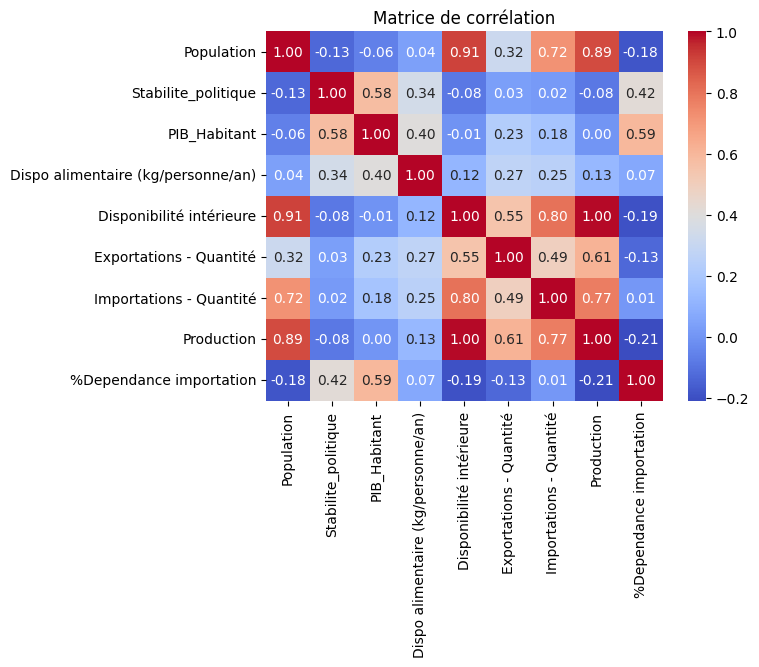

In [413]:
sns.heatmap(coorelation_variables, annot =True, fmt=".2f", cmap="coolwarm")
plt.title('Matrice de corrélation')

In [414]:
df.to_csv("donnees_nettoyées.csv", index=False)